## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns = ['EIN'], inplace=True)
application_df.drop(columns = ['NAME'], inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
# application_df.duplicated().sum()
for i in application_df.columns:
    print(i, len(application_df[i].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_counts[application_type_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = application_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Get the input shape
X_train_scaled.shape

(25724, 43)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]

hidden_node1 = 80
hidden_node2 = 30
#Adding a third hidden layer for funsies
hidden_node3 = 30

nn_model_1 = tf.keras.models.Sequential()

# First hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features))

# Second hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))

# Third hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node3, activation='relu'))

# Output layer
nn_model_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,911
Trainable params: 6,911
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#creating a callback that saves the model's weights every 5 epochs
#import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoints variables
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path= 'checkpoints/weights.{epoch}.hdf5'

# Create callback 
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq='epoch',
                              period=5)

In [17]:
# Train the model
fit_model_1 = nn_model_1.fit(X_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.5712 - accuracy: 0.7184
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5539 - accuracy: 0.7280
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5514 - accuracy: 0.7308
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7316
Epoch 5/50
798/804 [============================>.] - ETA: 0s - loss: 0.5492 - accuracy: 0.7310
Epoch 5: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7311
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7320
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7312
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7322
Epoch 9/50
804/804 [==============================] - 3s 3ms/st

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5619 - accuracy: 0.7272 - 857ms/epoch - 3ms/step
Loss: 0.5619133114814758, Accuracy: 0.7272303104400635


<AxesSubplot:>

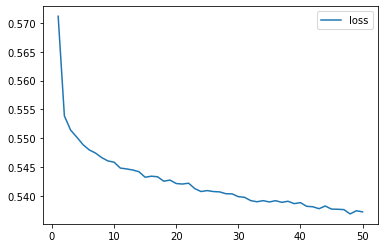

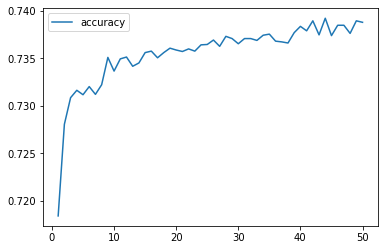

In [19]:
# Export our model to HDF5 file
#  creating a DataFrame to contain the training history for saving the file
history_df = pd.DataFrame(fit_model_1.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [20]:
nn_model_1.save('../h5_files/AlphabetSoupCharity_model_1.h5')